# Supervised Machine Learning: regression and its metrics
Regression in machine learning is a technique used for predicting continuous outcomes. In simple terms, it's like finding the best-fitting line through a scatter plot of data points. This line can then be used to predict future values. For example, if you want to predict the mileage of a car based on its features like weight, horsepower, and displacement, you could use regression. You would plot the average MPG of each car given its features, then use regression to find the relationship between MPG and the features. This relationship can then be used to predict the MPG of other cars based on their features.

---
## 1.&nbsp;Import libraries and files 💾
For this workshop, we'll be using the diamonds dataset from seaborn, which contains information on diamond prices and their attributes, such as carat, cut, color, and clarity.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

---
## 2.&nbsp;The diamond dataset 💎
The dataset provides detailed information about a collection of nearly 54,000 round-cut diamonds. It includes various attributes of each diamond, such as its cut quality, clarity, color, depth, table, price, and dimensions (x, y, z).

* price: price in US dollars
* carat: weight of the diamond
* cut: quality of the cut
* color: diamond colour
* clarity: a measurement of how clear the diamond is
* x: length in mm
* y: width in mm
* z: depth in mm
* depth: total depth percentage
* table: width of top of diamond relative to widest point

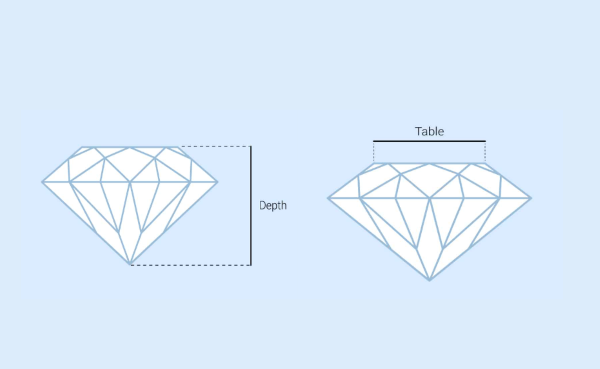


Our goal will be to predict the price of a diamond based on these attributes. Let's start by loading the dataset and exploring its structure.

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds.shape

(53940, 10)

To get a sense of the dataset, let's take a look at the first few rows using the head method:

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


---
## 3.&nbsp;Creating a dummy model 🤖
Prior experience leads me to believe that the carat of a diamond can influence its price. Let's look at the relationship between the carat and price columns to see if that's true.

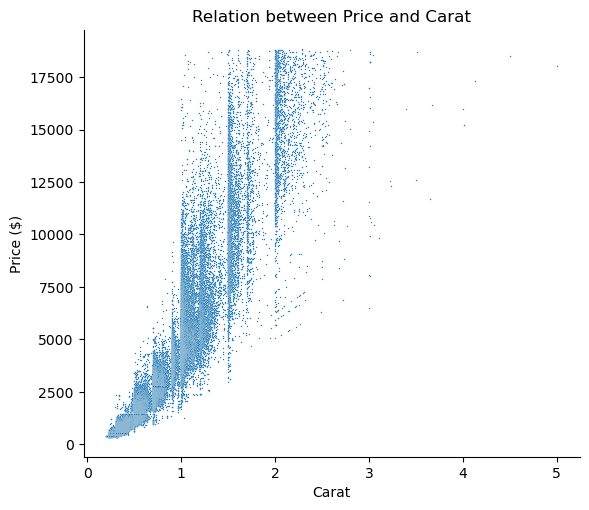

In [7]:
import seaborn as sns

(sns.relplot(data=diamonds,
            x='carat',
            y='price',
            s=1,
            height=5,
            aspect=1.2)
            #scatter_kws={'s': 5})  # Set 's' to a smaller value to make points smaller
  .set(title='Relation between Price and Carat')
  .set_axis_labels('Carat', 'Price ($)')
)

Looking at our plot of the relationship between carat and price, we can come up with a simple dummy model based on a linear relationship between the two variables. For example, we can assume that the price of a diamond is roughly 6,000 times its carat weight. This would give us a simple model like:

`price = carat * 6000`

Let's plot a line on the chart to see how carat * 6000 would look

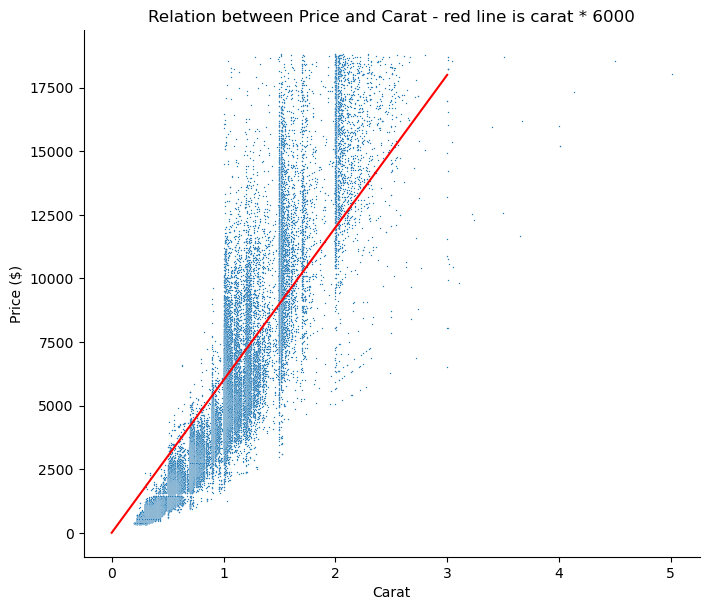

In [8]:
(
  sns.relplot(data=diamonds,
              x='carat',
              y='price',
              s=1,
              height=6,
              aspect=1.2)
  .set(title='Relation between Price and Carat - red line is carat * 6000')
  .set_axis_labels('Carat', 'Price ($)')
)
plt.plot([0, 3], [0, 18000], 'r-')
plt.show();

This appears to be a decent fit for our dummy model. However, assessing its performance becomes a different challenge compared to classification tasks. In classification, we can easily determine how well our model performs by checking if it correctly predicts the categories. But with regression, where our predictions involve continuous values like prices, they don't fall into distinct categories. Hence, we must employ alternative techniques to evaluate the effectiveness of our regression model.

First, let's create our dummy model as a function so we can use it.

In [9]:
def dummy_model(carat):
    return carat * 6000

We will soon test our dummy model against SKLearns models, so lets perform a train test split. We'll compare all of the models on how well they perform on the test data.

In [10]:
X = diamonds.copy()
y = X.pop('price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now let's make predictions for the test set using our dummy model.

In [11]:
dummy_y_test_pred = dummy_model(X_test['carat'])

In [12]:
dummy_y_test_pred

1388     1440.0
50052    3480.0
41645    2400.0
42377    2580.0
17244    9300.0
          ...  
44081    3000.0
23713    1500.0
31375    1860.0
21772    7380.0
4998     6480.0
Name: carat, Length: 10788, dtype: float64

Now that we have our predictions for the test set, we can evaluate how good (or bad) these predictions are.

---
## 4.&nbsp;Assessing a regression model with SKLearn 📈

Metrics serve as quantitative measures to evaluate the model's prediction accuracy compared to the actual target values. The choice of a metric depends on the specific regression task and data nature. Selecting the right metric beforehand is vital for guiding model development, tuning hyperparameters, and making decisions about feature engineering and model architecture. While it's recommended to have one primary evaluation metric as your main goal, examining multiple metrics provides valuable insights into the model's strengths and weaknesses. Here, we'll explore four common metrics to gain a better understanding of their calculations and meanings.

- For a comprehensive list of metrics, check [here](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics).
- To understand each regression metric and when to use them, refer to this [guide](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

### 4.1.&nbsp;Mean Absolute Error (MAE)
To calculate MAE, we first find the difference between the actual price and the predicted price for each row. Then, we take the absolute value of these differences (which means we ignore negative signs) and find the average of all these absolute differences.

Here's an example:

1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Absolute difference: |1.5| = 1.5

We repeat this process for all rows and find the average of the absolute differences. That's our Mean Absolute Error! The smaller the MAE, the better our model is at guessing the price.

- **Usage:** When you want a simple, interpretable metric that measures the average absolute difference between predicted and actual values.
- **Scenario:** Suitable for datasets with outliers, as it is less sensitive to them compared to RMSE.

In [13]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_mae

1639.666295884316

### 4.2.&nbsp;Root Mean Square Error
To calculate the Root Mean Squared Error (RMSE), we first find the difference between the actual and the predicted values for each data point. Then, we square these differences, which means we are **making all the differences positive and giving more weight** to larger differences. After squaring, we find the average of these squared differences and finally, take the square root of this average.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Squared difference: 1.5^2 = 2.25

We repeat this process for all rows, find the average of the squared differences, and take the square root of this average. The smaller the RMSE, the better our model is at predicting the price, with a greater penalty for larger errors as compared to the Mean Absolute Error (MAE).

- **Usage:** When you want to give more weight to larger errors, emphasizing significant deviations.
- **Scenario:** Useful if larger errors are particularly undesirable and you want a metric that penalizes them more.

In [14]:
from sklearn.metrics import root_mean_squared_error

dumb_rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_rmse

1956.2807655420934

### 4.3.&nbsp;Mean Absolute Percentage
To calculate the Mean Absolute Percentage Error (MAPE), we first find the difference between the actual and the predicted values for each data point. Then, we divide each of these differences by the actual value, **which gives us the relative error.** We take the absolute value of these relative errors to ignore negative signs and then calculate the average of these absolute percentage errors.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Relative error: 1.5 / 10.0 = 0.15
5. Absolute percentage error: |0.15| = 0.15 (15%)

We repeat this process for all rows and find the average of these absolute percentage errors. That's our Mean Absolute Percentage Error! The smaller the MAPE, the better our model is at predicting prices, with each error being a percentage of the actual value.

MAPE is a very intuitive measure because it directly tells us how far off our predictions are on average in terms of percentage. For example, a MAPE of 0.20 means that our predictions are, on average, 20% off from the actual prices. A lower MAPE indicates more accurate predictions.

- **Usage:** When you need a relative measure of error expressed as a percentage, providing an intuitive understanding of the model's accuracy.
- **Scenario:** Ideal for business and economic forecasting where percentage errors are more meaningful.

In [15]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dummy_y_test_pred)
dumb_mape

0.9384528370170875

### 4.4.&nbsp;R Squared 🧮
R-squared, also referred to as the coefficient of determination, measures the proportion of variance in the y (target labels) that can be explained by the model's predictions based on X (the feature matrix). With R-squared values ranging from 0 to 1, higher scores indicate a better fit, suggesting that the model can more effectively capture the variations in the target labels based on the features provided.

- **Example:** Imagine you're trying to predict students' exam scores based on their study time. R-squared helps you understand how much of the variation in exam scores can be explained by the variation in study time.

What does it mean if R2 is 0.8?

- **Usage:** When you want to measure how well your model explains the variability of the response variable.
- **Scenario:** Good for comparing different models on the same dataset to see which one explains more variance.

In [16]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_test,
                   y_pred = dummy_y_test_pred)

dumb_r2

0.759257884013869

**Metrics:**

- MAE : 1640
- RMSE : 1956
- MAPE : 93.85%
- R2 : 0.76

---
## 5.&nbsp;Creating a SKLearn model 🧠
SKLearn has a great [guide for models](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html#).

First off, before we do anything with models, we'll set up a preprocessor.

In [17]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [18]:
X_cat = X_train.select_dtypes(exclude = 'number').columns
X_num = X_train.select_dtypes(include = 'number').columns

cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color = ['D','E','F','G','H','I','J']
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

preprocessor = make_column_transformer(
    (OrdinalEncoder(categories=[cut, color, clarity]), X_cat),
    ("passthrough", X_num)
)

In [19]:
preprocessor

ColumnTransformer(transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['Fair', 'Good',
                                                             'Very Good',
                                                             'Premium',
                                                             'Ideal'],
                                                            ['D', 'E', 'F', 'G',
                                                             'H', 'I', 'J'],
                                                            ['I1', 'SI2', 'SI1',
                                                             'VS2', 'VS1',
                                                             'VVS2', 'VVS1',
                                                             'IF']]),
                                 Index(['cut', 'color', 'clarity'], dtype='object')),
                                ('passthrough', 'passthrough',
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])

### 5.1.&nbsp;DecisionTreeRegressor

Step-by-Step Process:

1. **Start with All Data:** Begin with the entire dataset.
2. **Find the Best Split:** Look for the feature and value that best splits the data into two groups to minimize prediction errors.
3. **Create Branches:** Split the data based on the best feature and value.
4. **Repeat:** Apply the same process recursively on each branch to create further splits until a stopping condition is met (like a maximum tree depth or minimum data points in a leaf).
5. **Make Predictions:** For a new data point, follow the decision rules down the branches of the tree to reach a leaf node, which provides the predicted value.

In [20]:
dt_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            DecisionTreeRegressor())

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object')),
                                                 ('passthrough', 'passthrough',
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

Predicting with the DecisionTreeRegressor

In [21]:
dt_predictions = dt_pipeline.predict(X_test)

How well is the DecisionTreeRegressor performing? Let's compare the R-squared with our dummy model

In [22]:
dt_r2 = r2_score(y_true = y_test,
                 y_pred = dt_predictions)

pd.DataFrame({"R2": [dumb_r2, dt_r2]},
             index=["dumb_model", "decision_tree"])

,R2
dumb_model,0.759258
decision_tree,0.967202


In [23]:
dt_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dt_predictions)
pd.DataFrame({"MAPE": [dumb_mape, dt_mape]},
             index=["dumb_model", "decision_tree"])

,MAPE
dumb_model,0.938453
decision_tree,0.082889


That's a big improvement! Let's see how a few other models perform.

### 5.2.&nbsp;SGDRegressor

Step-by-Step Process:

1. **Initialize Weights:** Start with random values for the model’s parameters (weights).
2. **Choose a Data Batch:** Pick a small, random subset of the training data.
3. **Calculate Error:** Use the current weights to make predictions and calculate the difference between predicted and actual values (error).
4. **Update Weights:** Adjust the weights slightly in the direction that reduces the error based on the gradient of the error with respect to the weights.
5. **Repeat:** Continue selecting new batches and updating weights until the model’s performance stabilizes or a set number of iterations is reached.
6. **Make Predictions:** Use the final weights to predict values for new data.

In [24]:
sgd_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

sgd_predictions = sgd_pipeline.predict(X_test)

### 5.3.&nbsp;LinearRegression

1. **Assume a Model:** Start with a linear equation of the form: 𝑦 = weights × features + bias
2. **Fit the Line:** Adjust the weights and bias to find the line that best fits the data points.
3. **Calculate Predictions:** Use the current weights and bias to predict values for the training data.
4. **Measure Error:** Find the difference between predicted values and actual values.
5. **Adjust Parameters:** Update weights and bias to minimize the error.
6. **Optimize Line:** Repeat adjusting weights and bias until the line best fits the data points.
7. **Make Predictions:** Use the final line equation to predict values for new data.

In [25]:
lr_pipeline = make_pipeline(preprocessor,
                            StandardScaler(),
                            LinearRegression())

lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)

---
## 6.&nbsp;Comparing our SKLearn models 🔍

In [26]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

comparing_models_df = pd.DataFrame({"R2": [dumb_r2, dt_r2, sgd_r2, lr_r2]},
                                    index=["dumb_model", "decision_tree", "sgd", "linear_regression"])

comparing_models_df

,R2
dumb_model,0.759258
decision_tree,0.967202
sgd,0.905395
linear_regression,0.905664


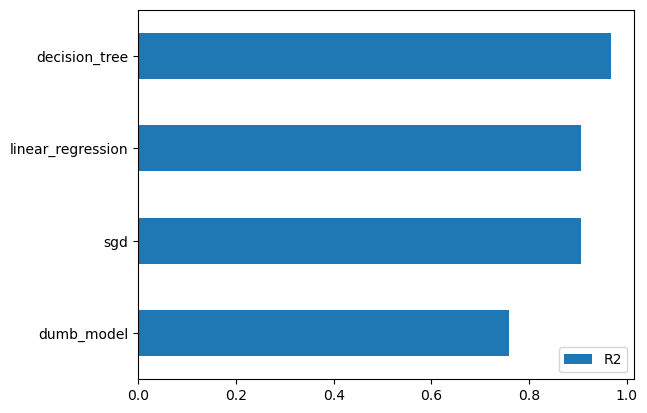

In [27]:
(
    comparing_models_df
    .sort_values(by='R2')
    .plot.barh()
);

Based on the R-squared scores provided, the Decision Tree model stands out as the best performer. A higher R-squared score indicates that the model can explain a larger proportion of the variance in the target labels (y) based on the features (X); meaning it can better capture the underlying relationships between the input features and the target labels, resulting in more accurate predictions.

---
## 7.&nbsp;Assessing a regression model manually 👀
Beyond examining the individual output metrics from SKLearn, we can gain deeper insights by visualising the calculated differences and plotting them. This approach allows us to evaluate the performance of our regression model more comprehensively.

### 7.1.&nbsp;Histogram of errors
By examining the histogram, we can assess if the errors follow a normal distribution, detect outliers, and identify any skewed data, ultimately aiding us in refining our model and addressing potential issues.

#### 7.1.1.&nbsp; Histogram of errors - dummy model
To construct the histogram, we begin by computing the errors. We expand our test set with two columns: the actual price and the predicted price. By examining the difference between these columns, we can evaluate the errors made by our model.

In [28]:
dummy_errors_df = X_test.copy()
dummy_errors_df["price"] = y_test
dummy_errors_df["prediction"] = dummy_y_test_pred
dummy_errors_df["error"] = dummy_errors_df["prediction"] - dummy_errors_df["price"]

In [ ]:
dummy_errors_df

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction,error
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47,559,1440.0,881.0
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26,2201,3480.0,1279.0
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95,1238,2400.0,1162.0
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98,1304,2580.0,1276.0
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61,6901,9300.0,2399.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44081,0.50,Very Good,E,VS1,61.6,59.0,5.06,5.14,3.14,1554,3000.0,1446.0
23713,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.07,2.50,633,1500.0,867.0
31375,0.31,Good,G,VVS1,58.0,62.0,4.42,4.47,2.58,761,1860.0,1099.0
21772,1.23,Ideal,F,VS1,62.5,54.0,6.85,6.82,4.27,9836,7380.0,-2456.0


Now that we have the error calculated for each row we can plot it.

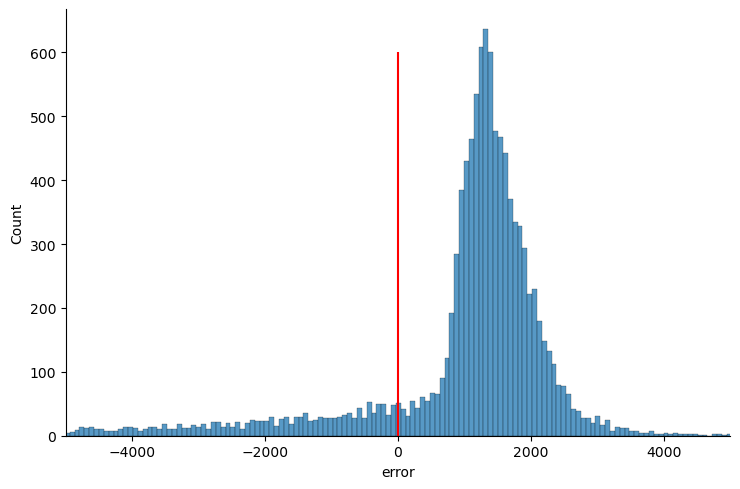

In [30]:
sns.displot(dummy_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=600,
           color='red')
plt.xlim(-5000,
         5000)
plt.show()

Our dumb model's predictions exhibit a left-skewed distribution, indicating a consistent tendency to overpredict the diamond prices. Specifically, there is a prominent peak on the right-hand side, where the model frequently overestimates the price by approximately $1700.

#### 7.1.2.&nbsp;Histogram of errors - decision tree model

In [31]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

In [32]:
dt_errors_df

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction,error
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47,559,559.0,0.0
50052,0.58,Very Good,F,VVS2,60.0,57.0,5.44,5.42,3.26,2201,2318.0,117.0
41645,0.40,Ideal,E,VVS2,62.1,55.0,4.76,4.74,2.95,1238,1238.0,0.0
42377,0.43,Premium,E,VVS2,60.8,57.0,4.92,4.89,2.98,1304,1062.0,-242.0
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61,6901,9808.0,2907.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44081,0.50,Very Good,E,VS1,61.6,59.0,5.06,5.14,3.14,1554,1849.0,295.0
23713,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.07,2.50,633,575.0,-58.0
31375,0.31,Good,G,VVS1,58.0,62.0,4.42,4.47,2.58,761,642.0,-119.0
21772,1.23,Ideal,F,VS1,62.5,54.0,6.85,6.82,4.27,9836,9660.0,-176.0


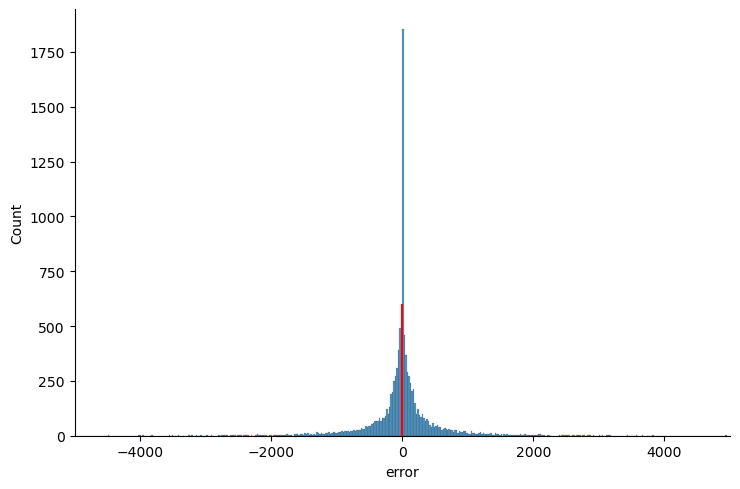

In [33]:
sns.displot(dt_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=600,
           color='red')
plt.xlim(-5000,
         5000)
plt.show()

We can see from our decision tree model that it is much more even handed in its over- and underestimation of the price. Also, there are significantly less large errors here compared to the dummy model.

### 7.2.&nbsp;Scatterplot of errors
A scatterplot can help guide us in a similar manner to a histogram

#### 7.2.1.&nbsp; Scatterplot of errors - dummy model

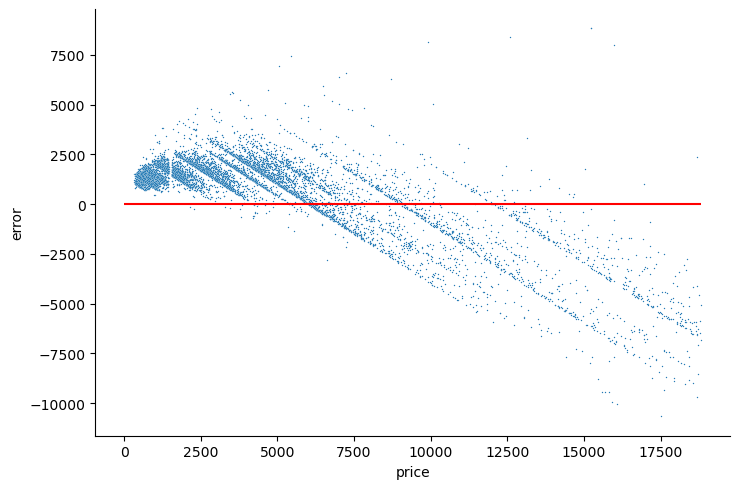

In [34]:
sns.relplot(data=dummy_errors_df,
            x='price',
            y='error',
            s=1,
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dummy_errors_df['price']),
           color='red')
plt.show()

We can see that the more expensive the diamonds become, the worse our model is at predicting the price.

#### 7.2.2.&nbsp;Scatterplot of errors - decision tree model

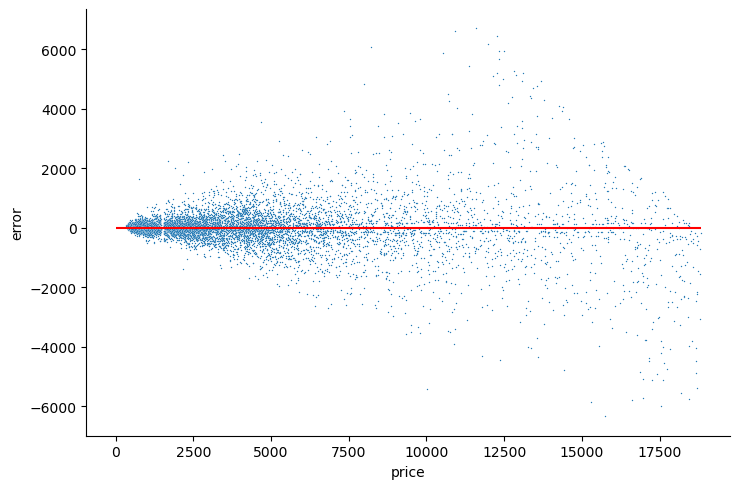

In [35]:
sns.relplot(data=dt_errors_df,
            x='price',
            y='error',
            s=1,
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dt_errors_df['price']),
           color='red')
plt.show()

From the y-axis range, it is evident that the decision tree performs better in predicting the price overall. The increased symmetry in the plot indicates that the model is not solely overpredicting or underpredicting, showing a balanced performance. However, the model still struggles with predicting prices for expensive diamonds. Remember, all models are wrong, but some are useful. Is our decision tree model useful? If yes, where would it be useful?

---
## Challenge

### 1. Data

In [68]:
import ctypes # beeper
import pandas as pd
from lightgbm import LGBMRegressor
from xgboost import DMatrix
from sklearn import set_config
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge, SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from ydata_profiling import ProfileReport

set_config(transform_output='pandas')

# reading
df = pd.read_csv('data/housing_iteration_6_regression.zip').set_index('Id').drop(
    columns=[
        'HouseStyle'
        , 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Functional'
        , 'GarageFinish', 'MiscFeature'])
df5 = pd.read_csv('data/housing_iteration_5_classification.zip').set_index('Id').drop(
    columns=[
        'HouseStyle'
        , 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Functional'
        , 'GarageFinish', 'MiscFeature'])

# X and y creation
X = df.copy()
y = X.pop('SalePrice')

# # Feature Engineering
# X.loc[:, 'Cabin'] = X.Cabin.str[0]

# # data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=123)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [70]:
X_train.select_dtypes(exclude='number').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
X_categorical = X_train.select_dtypes(exclude='number').columns
X_cat_onehot = ['Neighborhood'] #X_train.select_dtypes(exclude='number').columns
X_cat_ordenc = X_categorical.copy().drop(X_cat_onehot)
X_numerical = X_train.select_dtypes(include='number').columns
print(X_categorical)
print('\n')
print(X_cat_ordenc)
print('\n')
print(X_cat_onehot)
print('\n')
print(X_numerical)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDriv

In [72]:
X_numerical_c0 = [
    'LotArea','LotFrontage','WoodDeckSF','ScreenPorch','OverallQual'
    ,'OverallCond','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','FullBath'
    ,'KitchenAbvGr','TotRmsAbvGrd','GarageArea','OpenPorchSF','3SsnPorch'
    ,'MiscVal','YrSold']
X_numerical_mean = [
    'TotalBsmtSF','BedroomAbvGr','Fireplaces','PoolArea','GarageCars'
    ,'MSSubClass','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1'
    ,'BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'
    ,'HalfBath','GarageYrBlt','EnclosedPorch','MoSold']

In [73]:
df.drop(columns=['SalePrice']).columns.sort_values().to_list() == df5.drop(columns=['Expensive']).columns.sort_values().to_list()

True

In [74]:
((df[df.drop(columns=['SalePrice']).columns.sort_values()].replace({None: 0})) != (df5[df5.drop(columns=['Expensive']).columns.sort_values()].replace({None: 0}))).sum().sum()

348

In [75]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
896,60,RL,71.0,7056,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,10,2008,WD,Normal,140000
170,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,1,2006,WD,Normal,228000
1026,20,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,0,3,2007,WD,Normal,112500
1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,4,2007,WD,Normal,106000
742,20,RL,65.0,6768,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,0,5,2008,WD,Normal,142000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,738,Gd,GdPrv,0,8,2006,WD,Alloca,274970
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,8,2009,WD,Normal,184900
733,60,RL,75.0,11404,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,7,2008,WD,Normal,222500
1051,20,RL,73.0,8993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,8,2007,New,Partial,176485


In [76]:
# profile = ProfileReport(df)

In [77]:
# profile.to_file('data/report.html')
# profile

### 2. Preprocessing

#### 2.1 Sort categorical columns

##### Batch #01

In [78]:
mszoning_order = ['RP', 'RL', 'RM', 'RH', 'FV', 'C (all)', 'A', 'I', 'NA']		
# MSZoning: Identifies the general zoning classification of the sale.
#     A	Agriculture
#     C	Commercial
#     FV	Floating Village Residential
#     I	Industrial
#     RH	Residential High Density
#     RL	Residential Low Density
#     RP	Residential Low Density Park 
#     RM	Residential Medium Density
X_train['MSZoning'].value_counts()

MSZoning
RL         913
RM         180
FV          53
RH          13
C (all)      9
Name: count, dtype: int64

In [79]:
street_order = ['Pave', 'Grvl']
# Street: Type of road access to property
#        Grvl	Gravel	
#        Pave	Paved
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [80]:
alley_order = ['Pave', 'Grvl', 'NA']
# Alley: Type of alley access to property
#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [81]:
lotshape_order = ['Reg', 'IR1', 'IR2', 'IR3']
# LotShape: General shape of property
#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [82]:
landcontour_order = ['Lvl', 'Bnk', 'HLS', 'Low']
# LandContour: Flatness of the property
#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

##### Batch #02

In [83]:
utilities_order = ['AllPub', 'NoSewr', 'NoSeWa', 'ELO', 'NA']
# Utilities: Type of utilities available
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only	
df['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [84]:
lotconfig_order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
# LotConfig: Lot configuration
#        Inside	Inside lot
#        Corner	Corner lot
#        CulDSac	Cul-de-sac
#        FR2	Frontage on 2 sides of property
#        FR3	Frontage on 3 sides of property	
df['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [85]:
landslope_order = ['Gtl', 'Mod', 'Sev']
# LandSlope: Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope
df['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [86]:
# Neighborhood

In [87]:
condition1_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', ['RRAn', 'RRAe'], ['RRNn', 'RRNe']]
condition1_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', 'RRAn', 'RRAe', 'RRNn', 'RRNe']
# Condition1: Proximity to various conditions
#     Artery	Adjacent to arterial street
#     Feedr	Adjacent to feeder street	
#     Norm	Normal	
#     RRNn	Within 200' of North-South Railroad
#     RRAn	Adjacent to North-South Railroad
#     PosN	Near positive off-site feature--park, greenbelt, etc.
#     PosA	Adjacent to postive off-site feature
#     RRNe	Within 200' of East-West Railroad
#     RRAe	Adjacent to East-West Railroad
df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

##### Batch #03

In [88]:
condition2_order = ['PosA', 'PosN', 'Norm', 'Artery', 'Feedr', 'RRAn', 'RRAe', 'RRNn', 'RRNe']
# Condition2: Proximity to various conditions
#     Artery	Adjacent to arterial street
#     Feedr	Adjacent to feeder street	
#     Norm	Normal	
#     RRNn	Within 200' of North-South Railroad
#     RRAn	Adjacent to North-South Railroad
#     PosN	Near positive off-site feature--park, greenbelt, etc.
#     PosA	Adjacent to postive off-site feature
#     RRNe	Within 200' of East-West Railroad
#     RRAe	Adjacent to East-West Railroad
df['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [89]:
bldgtype_order = ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', 'TwnhsI']
# BldgType: Type of dwelling
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
df['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [90]:
# HouseStyle

In [91]:
roofstyle_order = ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']
# RoofStyle: Type of roof
#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed
df['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [92]:
roofmatl_order = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
# RoofMatl: Roof material
#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles
df['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

##### Batch #04

In [93]:
# Exterior1st

In [94]:
# Exterior2nd

In [95]:
# MasVnrType

In [96]:
exterqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
# ExterQual: Evaluates the quality of the material on the exterior 
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [97]:
extercond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
# ExterCond: Evaluates the present condition of the material on the exterior
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

##### Batch #05

In [98]:
foundation_order = ['PConc', 'CBlock', 'BrkTil', 'Stone', 'Slab', 'Wood']
# Foundation: Type of foundation
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
df['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [99]:
bsmtqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# BsmtQual: Evaluates the height of the basement
#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
df['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [100]:
bsmtcond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# BsmtCond: Evaluates the general condition of the basement
#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement
df['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [101]:
bsmtexposure_order = ['Gd', 'Av', 'Mn', 'No', 'NA']
# BsmtExposure: Refers to walkout or garden level walls
#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement
df['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [102]:
bsmtfintype1_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
# BsmtFinType1: Rating of basement finished area
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
df['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

##### Batch #06

In [103]:
bsmtfintype2_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
# BsmtFinType1: Rating of basement finished area
#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement
df['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [104]:
heating_order = ['GasW', 'OthW', 'GasA', 'Floor', 'Wall', 'Grav']
# Heating: Type of heating
#     Floor	Floor Furnace
#     GasA	Gas forced warm air furnace
#     GasW	Gas hot water or steam heat
#     Grav	Gravity furnace	
#     OthW	Hot water or steam heat other than gas
#     Wall	Wall furnace
df['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [105]:
heatingqc_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
df['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [106]:
centralair_order = ['Y', 'N']
# CentralAir: Central air conditioning
#        N	No
#        Y	Yes
df['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [107]:
electrical_order = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'NA']
# Electrical: Electrical system
#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed
df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

##### Batch #07

In [108]:
kitchenqual_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# KitchenQual: Kitchen quality
#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
df['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [109]:
# Functional

In [110]:
fireplacequ_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# FireplaceQu: Fireplace quality
#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [111]:
garagetype_order = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA']
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [112]:
# GarageFinish

##### Batch #08

In [113]:
garagequal_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [114]:
garagecond_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
# GarageCond: Garage condition
#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
df['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [115]:
paveddrive_order = ['Y', 'P', 'N']
# PavedDrive: Paved driveway
#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
df['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [116]:
poolqc_order = ['Ex', 'Gd', 'TA', 'Fa', 'NA']
# PoolQC: Pool quality
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [117]:
fence_order = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']
# Fence: Fence quality
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence
df['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

##### Batch #09

In [118]:
# MiscFeature

In [119]:
salestype_order = ['WD', 'CWD', 'VWD', 'New', 'COD', 'Con', 'ConLw', 'ConLI', 'ConLD', 'Oth', 'NA']
# SaleType: Type of sale
#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
df['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [120]:
salecondition_order = ['Normal', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial']
# SaleCondition: Condition of sale
#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

#### 2.2 Transformers and regressors

In [156]:
pipe_numerical_mean = Pipeline([('simple_imputer', SimpleImputer(strategy='mean'))])
pipe_numerical_constant = Pipeline([('simple_imputer', SimpleImputer(strategy='constant', fill_value=0))])
pipe_categorical = Pipeline([('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))])

pipe_cat_ordenc = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))
    , ('order_encoder', OrdinalEncoder(categories=[
        mszoning_order, street_order, alley_order, lotshape_order, landcontour_order # batch #01
        , utilities_order, lotconfig_order, landslope_order, condition1_order # batch #02
        , condition2_order, bldgtype_order, roofstyle_order, roofmatl_order # batch #03
        , exterqual_order, extercond_order # batch #04
        , foundation_order, bsmtqual_order, bsmtcond_order, bsmtexposure_order, bsmtfintype1_order # batch #05
        , bsmtfintype2_order, heating_order, heatingqc_order, centralair_order, electrical_order # batch #06
        , kitchenqual_order, fireplacequ_order, garagetype_order # batch #07
        , garagequal_order, garagecond_order, paveddrive_order, poolqc_order, fence_order # batch #08
        , salestype_order, salecondition_order])) # batch #09
])

pipe_cat_onehot = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='NA'))
    , ('onehot_encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

classifiers = [
    ("decision_tree", DecisionTreeRegressor()),
    ("random_forest", RandomForestRegressor()),
    ("linear", LinearRegression()),
    ("logistic", LogisticRegression()),
    ("knn", KNeighborsRegressor())
]

transform_imputer = ColumnTransformer([
    ('num_scale_and_impute_mean', pipe_numerical_mean, X_numerical_mean)
    , ('num_scale_and_impute_constant', pipe_numerical_constant, X_numerical_c0)
    , ('cat_order', pipe_cat_ordenc, X_cat_ordenc)
    # , ('cat_onehot', pipe_cat_onehot, X_cat_onehot)
])

pipeline = Pipeline([
    ('preprocessor', transform_imputer)
    , ('standard_scaler', StandardScaler())
    , ('regressor', RandomForestRegressor())
]) # regressor as a placeholder
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'HalfBath...
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standard_scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [154]:
pipeline.predict(X=X_train)#, y=y_train)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'HalfBath...
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')),
                                                 ('cat_onehot',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Neighborhood'])])),
                ('standard_scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

### Grid search

#### Other grids

In [176]:
# define parameter grid
param_grid = [
     {
        'regressor': [RandomForestRegressor()]
        , 'regressor__n_estimators': [170] # range(100, 201, 10)
        , 'regressor__criterion': ['squared_error', 'poisson']
        , 'regressor__max_depth': [60] # range(40, 66, 5)
        , 'regressor__min_samples_split': [2] # range(1, 11, 1)
        , 'regressor__min_samples_leaf': [2] #range(1, 5, 1)
        , 'regressor__min_weight_fraction_leaf': [0] #, 0.1, 1, 10]
        # , 'regressor__class_weight': ['balanced', None]
        # , 'regressor__ccp_alpha': [0, 0.000001, 0.00001]
        # , 'regressor__max_features': ['sqrt', 'log2']
    }
]

# define GridSearchCV
param_search = GridSearchCV(
    pipeline
    , param_grid
    , scoring='r2'
    , cv=5
    , verbose=1)
param_search.fit(X_train, y_train)

print(f'Best model: {param_search.best_estimator_}')
print(f'Best score: {param_search.best_score_}')
print(f'Best parameters: {param_search.best_params_}')

# y_pred = param_search.best_estimator_.predict(X_train)
_ = ctypes.windll.kernel32.Beep(1000, 100)
# print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')
# param_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit

Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'HalfBath...
       'Heating', 'Heat

#### Current grid

In [151]:
# define parameter grid
param_grid = [
    {
        'regressor': [SGDRegressor()]
        , 'regressor__alpha': [0, 1e-5]
        , 'regressor__penalty': ['l2', 'l1', 'elasticnet']
        # , 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
        , 'regressor__max_iter': [1000, 3000, 5000, 10000]
        # , 'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
        # , 'regressor__eta0': [0.1, 0.01, 0.001]
        # , 'regressor__tol': [1e-4, 1e-3, 1e-2]
        # , 'regressor__early_stopping': [True, False]
        # , 'regressor__epsilon': [1e-2, 1e-1, 0.5, 1]
        , 'regressor__loss': ['squared_error']#, 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
        # , 'regressor__power_t': [0.1, 0.25, 0.5]
        # , 'regressor__boosting_type': ['gbdt', 'dart', 'goss']
        # , 'regressor__boosting_type': ['gbdt', 'dart', 'goss']
    }
]

# define GridSearchCV
param_search = GridSearchCV(
    pipeline
    , param_grid
    , scoring='r2'
    , cv=5
    , verbose=1)
param_search.fit(X_train, y_train)

print(f'Best model: {param_search.best_estimator_}')
print(f'Best score: {param_search.best_score_}')
print(f'Best parameters: {param_search.best_params_}')

# y_pred = param_search.best_estimator_.predict(X_train)
_ = ctypes.windll.kernel32.Beep(1000, 2000)
# print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')
# param_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_scale_and_impute_mean',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer())]),
                                                  ['TotalBsmtSF',
                                                   'BedroomAbvGr', 'Fireplaces',
                                                   'PoolArea', 'GarageCars',
                                                   'MSSubClass', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                        

In [152]:
pd.DataFrame(param_search.cv_results_).sort_values(by='rank_test_score').head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__alpha,param_regressor__loss,param_regressor__max_iter,param_regressor__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.050831,0.007818,0.019638,0.002499,SGDRegressor(),0.00001,squared_error,1000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.438623,0.830301,0.834989,0.817270,0.803000,0.744837,0.153511,1
3,0.052253,0.009004,0.021902,0.003309,SGDRegressor(),0,squared_error,3000,l2,"{'regressor': SGDRegressor(), 'regressor__alph...",0.418144,0.839323,0.820817,0.820608,0.824341,0.744647,0.163396,2
20,0.056696,0.006490,0.021432,0.003336,SGDRegressor(),0.00001,squared_error,5000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.454462,0.816889,0.830690,0.792128,0.822600,0.743354,0.145019,3
23,0.049941,0.005085,0.019580,0.002994,SGDRegressor(),0.00001,squared_error,10000,elasticnet,"{'regressor': SGDRegressor(), 'regressor__alph...",0.421244,0.826046,0.815303,0.832918,0.819713,0.743045,0.161010,4
4,0.055098,0.008709,0.022702,0.003829,SGDRegressor(),0,squared_error,3000,l1,"{'regressor': SGDRegressor(), 'regressor__alph...",0.454686,0.829258,0.797140,0.822119,0.811816,0.743004,0.144563,5


In [112]:
from pprint import pprint

pprint(param_search.cv_results_)

{'mean_fit_time': array([0.16095338, 0.1596333 , 0.1006084 , 0.06260414]),
 'mean_score_time': array([0.02703352, 0.02262917, 0.02367716, 0.        ]),
 'mean_test_score': array([-0.0960598 , -0.12537669, -0.09697116,         nan]),
 'param_regressor': masked_array(data=[LGBMRegressor(), LGBMRegressor(), LGBMRegressor(),
                   LGBMRegressor()],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_regressor__boosting_type': masked_array(data=['gbdt', 'dart', 'goss', 'rf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'regressor': LGBMRegressor(), 'regressor__boosting_type': 'gbdt'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'dart'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'goss'},
            {'regressor': LGBMRegressor(), 'regressor__boosting_type': 'rf'}],
 'rank_test_score': array([1, 3, 2, 4]),

ValueError: could not convert string to float: 'RL'

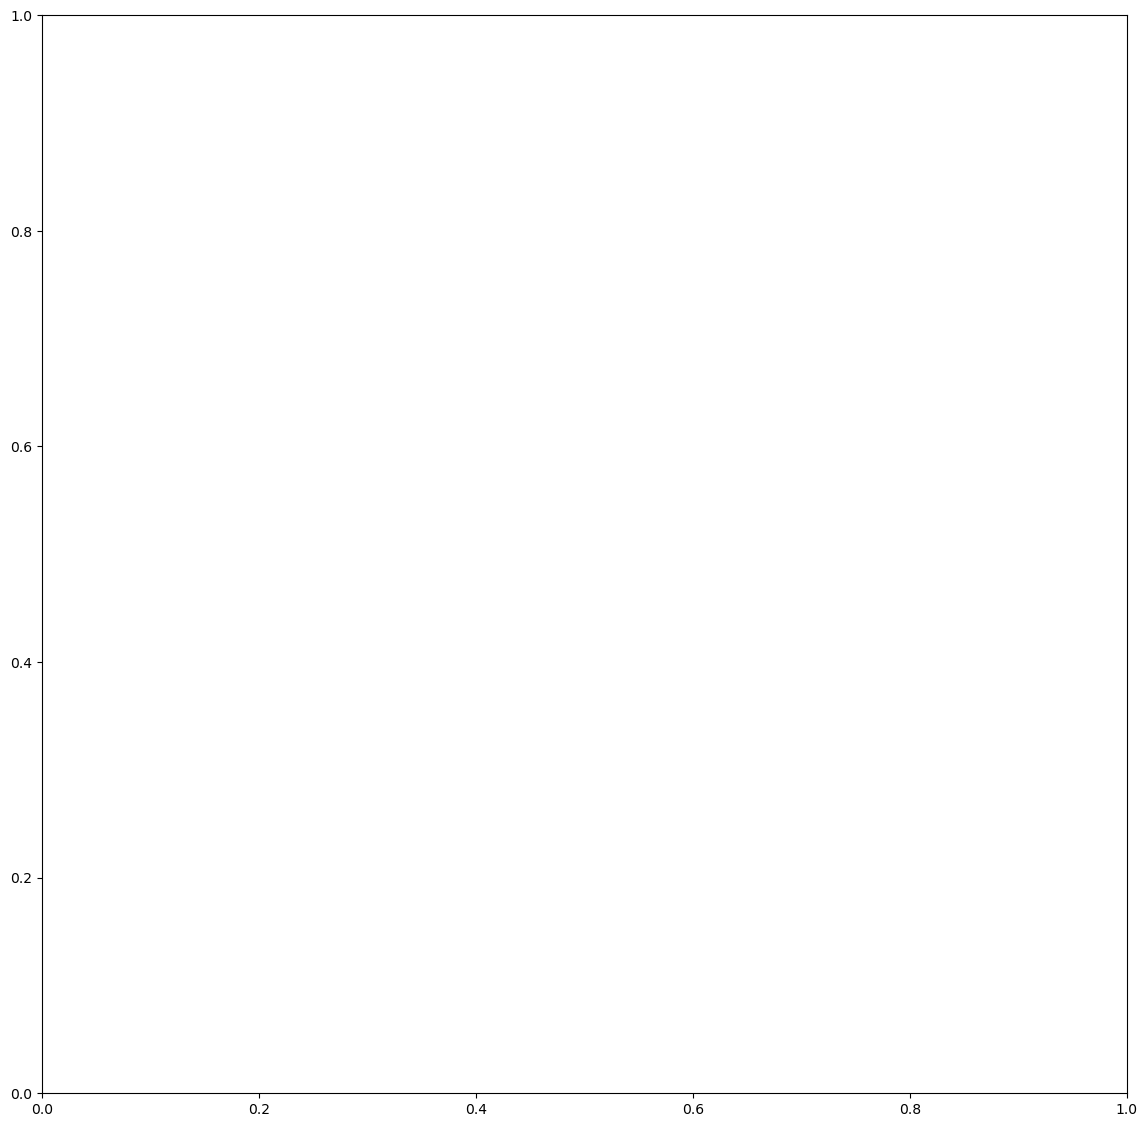

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr());